In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Настройка вывода кол. колонок
pd.set_option("display.max_columns",30)

In [3]:
portrait_CG1 = pd.read_csv('portrait_CG1.csv',delimiter=';')
payments_CG1 = pd.read_csv('payments_CG1.csv',delimiter=';')

In [4]:
portrait_CG2 = pd.read_csv('portrait_CG2.csv',delimiter=';')
payments_CG2 = pd.read_csv('payments_CG2.csv',delimiter=';')

In [5]:
portrait_TG = pd.read_csv('portrait_TG.csv',delimiter=';')
payments_TG = pd.read_csv('payments_TG.csv',delimiter=';')

In [6]:
portrait_CG1.head()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
0,892319115,25,435,NaN,US,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,US,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,FR,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0
3,891060786,26,0,NaN,AR,"1,2,3,4,5",1,23,29,0,NaN,NaN,0
4,892006554,35,294,NaN,US,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0


In [7]:
portrait_CG2.head()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
0,892035504,37,137,NaN,IL,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,IT,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,FR,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,FR,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,US,1,1,35,53,94,NaN,NaN,0


In [8]:
portrait_TG.head()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
0,892309896,27,685,NaN,US,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,DE,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,IL,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,US,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,FR,NaN,1,24,30,1,1.0,NaN,0


In [9]:
print(f'Кол. записей гр.1  {portrait_CG1.shape}')
print(f'Кол. записей гр.2  {portrait_CG2.shape}')
print(f'Кол. записей гр. тестовая  {portrait_TG.shape}')

Кол. записей гр.1  (4340, 13)
Кол. записей гр.2  (4264, 13)
Кол. записей гр. тестовая  (4308, 13)


In [10]:
print(f'Кол. записей  платежи гр.1  {payments_CG1.shape}')
print(f'Кол. записей платежи гр.2  {payments_CG2.shape}')
print(f'Кол. записей платежи гр. тестовая  {payments_TG.shape}')

Кол. записей  платежи гр.1  (1007, 8)
Кол. записей платежи гр.2  (328, 8)
Кол. записей платежи гр. тестовая  (273, 8)


### Количество платежей по второй группе по сравнению с первой значительно меньше, при одинаковом кол. пользователей в этих группах.

In [93]:
payments_CG1[payments_CG1['product_type'] == 'prem']['revenue'].mean()

7351.5

In [92]:
payments_CG2[payments_CG2['product_type'] == 'prem']['revenue'].mean()

6960.8317757009345

In [94]:
payments_TG[payments_TG['product_type'] == 'prem']['revenue'].mean()

10667.184210526315

### Исходя из данных платежей, среднее значение в контрольной группе не увеличилось в 2 раза. Но среднее значение выросло.

In [72]:
portrait_TG['is_special'].value_counts(normalize = True)

0.0    0.963556
1.0    0.036444
Name: is_special, dtype: float64

In [96]:
portrait_CG1['is_special'].value_counts(normalize = True)

0.0    0.95576
1.0    0.04424
Name: is_special, dtype: float64

In [97]:
portrait_CG2['is_special'].value_counts(normalize = True)

0.0    0.955206
1.0    0.044794
Name: is_special, dtype: float64

### На текущий момент процентное соотношение пользователей в контрольной группе с премиум подпиской не значительно снизилось относительно тестовых групп.(можно было ожидать что при повышении платы в 2 раза они могли отказаться от премиум подписки)

#### для независисых выборо для сравнения средних можно применить t-критерий Стьюдента, но распределние не нормальное, поэтому буду применять непараметрический тест.

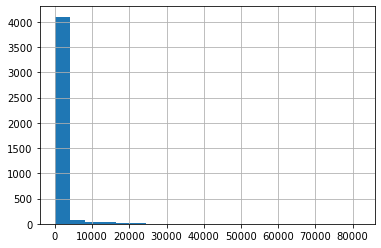

In [106]:
portrait_CG2['total_revenue'].hist(bins=20)

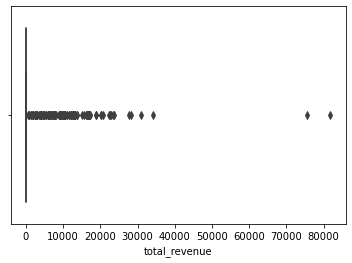

In [107]:
sns.boxplot(portrait_CG2['total_revenue'])

In [85]:
from scipy.stats import mannwhitneyu

### Нулевая гипотеза : суммарная выручка в контрольной группе неизменилась

In [82]:
print('Средние значения выручки по группам: ')
print('Тестовая 1 : ', round(portrait_CG1['total_revenue'].mean(),1))
print('Тестовая 2 : ', round(portrait_CG2['total_revenue'].mean(),1))
print('Контрольная : ', round(portrait_TG['total_revenue'].mean(),1))

Средние значения выручки по группам: 
Тестовая 1 :  594.8
Тестовая 2 :  450.4
Контрольная :  534.1


In [86]:
#Отличаются ли среднии в этих группе 2 и контрольной группой
stat, p = mannwhitneyu(portrait_CG2['total_revenue'], portrait_TG['total_revenue'])

In [87]:
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=9096934.500, p=0.011


In [88]:
alpha = 0.05
if p > alpha:
    print('Одно распределение (нет оснований отвергнуть нулевую гипотезу)')
else:
    print('Средние отличаются (отвергаем нулевую гипотезу)')

Средние отличаются (отвергаем нулевую гипотезу)


### Наблюдаем значимое увеличение выручки в контрольной группе по сравнению с 2-ой

In [89]:
#Аналогично проверим первую группу и тестовую
stat, p = mannwhitneyu(portrait_CG1['total_revenue'], portrait_TG['total_revenue'])

In [90]:
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=9254877.500, p=0.008


In [91]:
alpha = 0.05
if p > alpha:
    print('Одно распределение (нет оснований отвергнуть нулевую гипотезу)')
else:
    print('Средние отличаются (отвергаем нулевую гипотезу)')

Средние отличаются (отвергаем нулевую гипотезу)


### Наблюдаем значимое снижение выручки в контрольной группе по сравнению с 1-ой

In [23]:
portrait_CG1 = portrait_CG1.fillna(0)

In [25]:
portrait_CG2 = portrait_CG2.fillna(0)
portrait_TG = portrait_TG.fillna(0)

(-0.5, 3.5, 0.0, 160.0)

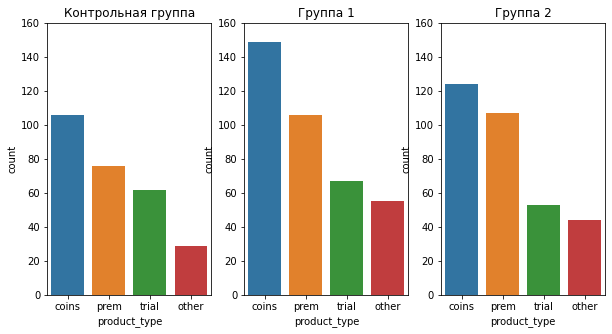

In [49]:
plt.rcParams['figure.figsize']=(10,5)
fig, ax =plt.subplots(1,3)
fig = sns.countplot(x = 'product_type', data = payments_TG , order = payments_TG['product_type'].value_counts().index,ax=ax[0])
ax[0].set_title('Контрольная группа')
fig.axis(ymax=160)
fig_1 = sns.countplot(x = 'product_type', data = payments_CG1, order = payments_CG1['product_type'].value_counts().index,ax=ax[1])
ax[1].set_title('Группа 1')
fig_1.axis(ymax=160)
fig_2 = sns.countplot(x = 'product_type', data = payments_CG2, order = payments_CG2['product_type'].value_counts().index,ax=ax[2])
ax[2].set_title('Группа 2')
fig_2.axis(ymax=160)
#Сравнение платежей для типов продуктов  в абсолютном количестве ( без учета кол. в группе)

In [48]:
portrait_TG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  4308 non-null   int64  
 1   age                      4308 non-null   int64  
 2   attraction_distribution  4308 non-null   int64  
 3   coins                    49 non-null     float64
 4   country                  4308 non-null   object 
 5   retention_days           2978 non-null   object 
 6   sex                      4308 non-null   int64  
 7   user_dating.age_start    4308 non-null   int64  
 8   user_dating.age_end      4308 non-null   int64  
 9   view_count               4308 non-null   int64  
 10  was_special              408 non-null    float64
 11  is_special               157 non-null    float64
 12  total_revenue            4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


In [51]:
payments_TG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             273 non-null    int64 
 1   registration_date   273 non-null    object
 2   payment_date        273 non-null    object
 3   revenue             273 non-null    int64 
 4   payment_service_id  273 non-null    int64 
 5   place               273 non-null    object
 6   country             273 non-null    object
 7   product_type        273 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


In [23]:
portrait_CG1 = portrait_CG1.fillna(0)

In [25]:
portrait_CG2 = portrait_CG2.fillna(0)
portrait_TG = portrait_TG.fillna(0)

In [26]:
portrait_TG['is_special'].value_counts()

0.0    4151
1.0     157
Name: is_special, dtype: int64

In [27]:
portrait_CG1.head()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
0,892319115,25,435,0.0,US,"1,2,3,4,5,6",0,22,32,982,0.0,0.0,0
1,891248523,29,500,0.0,US,"1,2",1,26,32,12,0.0,0.0,0
2,891670932,33,800,0.0,FR,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,0.0,0.0,0
3,891060786,26,0,0.0,AR,"1,2,3,4,5",1,23,29,0,0.0,0.0,0
4,892006554,35,294,0.0,US,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,0.0,0.0,0


In [28]:
payments_TG.head()

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
0,891345942,05.11.2017 13:00,13.11.2017 15:04,12909,147,TrialVipPopup,IT,trial
1,892054251,22.10.2017 0:33,30.10.2017 1:37,13923,147,TrialVipPopup,US,trial
2,892236423,18.10.2017 1:09,23.10.2017 0:15,3783,67,Menu,US,other
3,892236423,18.10.2017 1:09,27.10.2017 22:38,3783,67,Menu,US,other
4,892168170,19.10.2017 17:10,27.10.2017 19:10,9087,147,TrialVipPopup,US,trial


In [51]:
payments_TG[payments_TG['product_type'] == 'prem'].shape[0] / payments_TG.shape[0]

0.2783882783882784

In [52]:
payments_CG1[payments_CG1['product_type'] == 'prem'].shape[0] / payments_CG1.shape[0]

0.10526315789473684

In [53]:
payments_CG2[payments_CG2['product_type'] == 'prem'].shape[0] / payments_CG2.shape[0]

0.32621951219512196

In [ ]:
fig, ax =plt.subplots(1,3)
sns.boxplot(payments_CG2['revenue'])

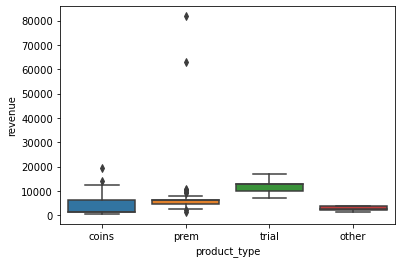

In [83]:
sns.boxplot(x='product_type', y=payments_CG2['revenue'], data=payments_CG2)

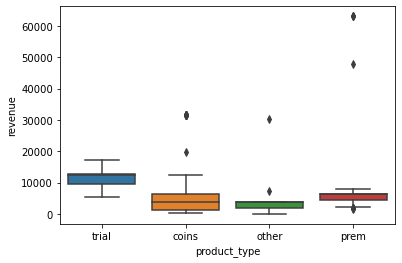

In [84]:
sns.boxplot(x='product_type', y=payments_CG1['revenue'], data=payments_CG1)

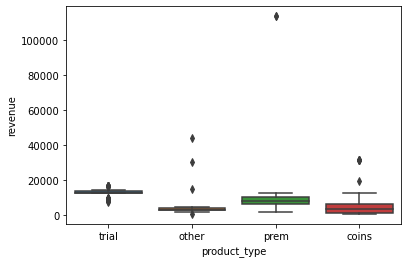

In [85]:
sns.boxplot(x='product_type', y=payments_TG['revenue'], data=payments_TG)

In [88]:
payments_TG[payments_TG['product_type'] == 'prem']

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
5,892426491,14.10.2017 10:13,15.10.2017 22:39,12597,147,AutoReplyMessage,US,prem
6,891558921,01.11.2017 3:07,10.11.2017 9:05,9100,147,LeftMenu,US,prem
11,891861048,26.10.2017 2:55,10.11.2017 19:00,3588,68,none,CA,prem
12,891178380,08.11.2017 3:54,09.11.2017 21:53,113477,147,promo.key31,ES,prem
21,891312873,05.11.2017 21:22,10.11.2017 21:51,7852,147,promo.key31,IT,prem
...,...,...,...,...,...,...,...,...
262,891692940,29.10.2017 15:40,29.10.2017 15:43,9100,147,AutoReplyMessage,US,prem
265,891572565,31.10.2017 20:40,05.11.2017 13:32,9217,147,promo.key31,AE,prem
266,891478452,02.11.2017 23:29,12.11.2017 0:11,8697,147,AutoReplyMessage,AE,prem
267,891414915,04.11.2017 9:06,04.11.2017 9:56,6292,147,AutoReplyMessage,AR,prem


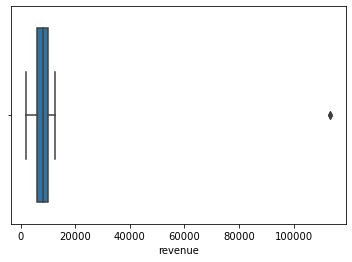

In [89]:
sns.boxplot(payments_TG[payments_TG['product_type'] == 'prem']['revenue'])

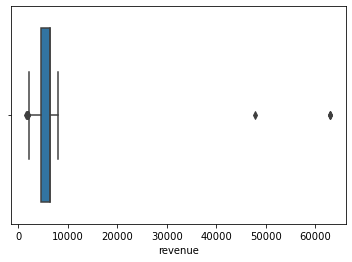

In [90]:
sns.boxplot(payments_CG1[payments_CG1['product_type'] == 'prem']['revenue'])

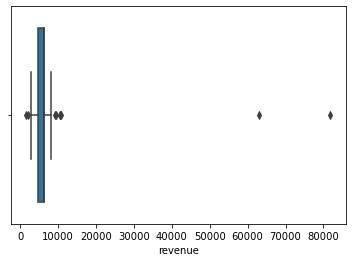

In [91]:
sns.boxplot(payments_CG2[payments_CG2['product_type'] == 'prem']['revenue'])